# Stock Prediction Research/Notes
Copied from the email:
3. Stock Prediction Using Sentiment
Goal: Explore how sentiment data can be used for forecasting market trends.
Initial Tasks:
Time Series Forecasting Research – Try ARIMA, LSTM, Prophet, Transformers. Identify relevant input features.

Define Prediction Goals – Short-term vs long-term, volatility prediction, etc.

Explore Advanced Models (Optional) – Reinforcement learning or other strategies using sentiment.
Deliverable: Jupyter notebook describing model options and pros/cons.

## Main idea

- The basic idea is that the way people feel about a company or the market in general can obviously influence stock prices
    - If a bunch of news articles are suddenly super positive about a company's new product, it might make more people want to buy its stock, driving the price up 
    - On the flip side, a wave of negative tweets could cause a stock to drop
- We can use Natural Language Processing (NLP) to analyze text from sources like Twitter, news articles, and financial reports to get a 'sentiment score'. This score, which is basically a number representing how positive or negative the text is, can then be used as a feature in our prediction models
    - We already sort of did this with our onboarding/trial project

## Input features

- Historical price data
    - Probably the easiest, we can simply use the opening price, closing price, highest price, and lowest price for each day. Volume (how many shares were traded) is also something we can consider.
- Sentiment scores
    - Basically what we did for our trial period
- Technical indicators
    - These are calculations based on historical price and volume data. Things like Moving Averages (MA), Relative Strength Index (RSI), and Bollinger Bands can help our models see trends.
        - MA: This is a simple moving average of the closing prices over a certain number of days. It's a way to smooth out price fluctuations and see if the price is trending up or down.
        - RSI: This is a technical indicator that measures the speed and change of price movements. It's used to identify overbought or oversold conditions.
        - Bollinger Bands: These are bands plotted on a chart that show where the price is relative to its average and standard deviation. They can help identify potential buy or sell signals.
- Fundamental Data
    - This is more about the company's health - things like revenue, earnings per share (EPS), and price-to-earnings (P/E) ratio. This is usually more important for long-term predictions
        - Revenue: Just the total amount of money a company makes, disregarding any expenses
        - EPS: Earnings per share is the net income of a company divided by the number of outstanding shares. It's a measure of how much profit a company is making per share of stock.
        - P/E ratio: This is the price of a share of stock divided by the earnings per share. It's a measure of how much investors are willing to pay for a company's earnings.

## Models

- ARIMA: This is a classic time series model that looks at patterns in the data over time. It's good for short-term predictions.
- LSTM: This is a type of neural network that can learn from patterns in the data over time. It's good for short-term predictions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

# Fake Data by GPT
dates = pd.date_range("2025-01-01", periods=15, freq="D")
data = {
    "Date": dates,
    "Close": [
        150.0,
        152.5,
        151.0,
        155.0,
        153.5,
        156.0,
        158.2,
        157.0,
        159.5,
        161.0,
        160.0,
        158.5,
        162.0,
        163.0,
        161.5,
    ],
    "Volume": [
        100000,
        120000,
        110000,
        150000,
        130000,
        160000,
        180000,
        170000,
        190000,
        200000,
        195000,
        185000,
        210000,
        220000,
        205000,
    ],
    "News": [
        "Company announces record profits for the year.",
        "New product launch receives amazing reviews.",
        "Market uncertainty leads to slight dip in tech stocks.",
        "CEO expresses great optimism for the next quarter.",
        "Analysts issue a neutral rating for the company.",
        "Company expands into a new, exciting market.",
        "Incredible sales figures reported, beating all estimates.",
        "Minor setback in production, but outlook remains positive.",
        "A fantastic breakthrough in research and development.",
        "Stock hits all-time high amid strong investor confidence.",
        "Some profit-taking occurs after a strong rally.",
        "Competitor announces a disappointing product.",
        "Company wins a major, prestigious award.",
        "Economic forecast is very good, boosting the whole sector.",
        "A terrible rumor circulates, causing a slight panic.",
    ],
}

Stock Analysis Results:
            Close  Volume  Sentiment    MA_5    RSI  BB_Middle  BB_Upper  \
Date                                                                       
2025-01-01  150.0  100000       0.00     NaN    NaN        NaN       NaN   
2025-01-02  152.5  120000       0.37     NaN    NaN        NaN       NaN   
2025-01-03  151.0  110000      -0.17     NaN    NaN        NaN       NaN   
2025-01-04  155.0  150000       0.40     NaN    NaN        NaN       NaN   
2025-01-05  153.5  130000       0.00  152.40  68.42     152.40    156.36   
2025-01-06  156.0  160000       0.22  153.60  75.00     153.60    157.56   
2025-01-07  158.2  180000       0.90  154.74  74.36     154.74    160.14   
2025-01-08  157.0  170000       0.09  155.94  76.32     155.94    159.56   
2025-01-09  159.5  190000       0.40  156.84  72.73     156.84    161.40   
2025-01-10  161.0  200000       0.30  158.34  87.88     158.34    162.30   
2025-01-11  160.0  195000       0.43  159.14  73.81     159.14  

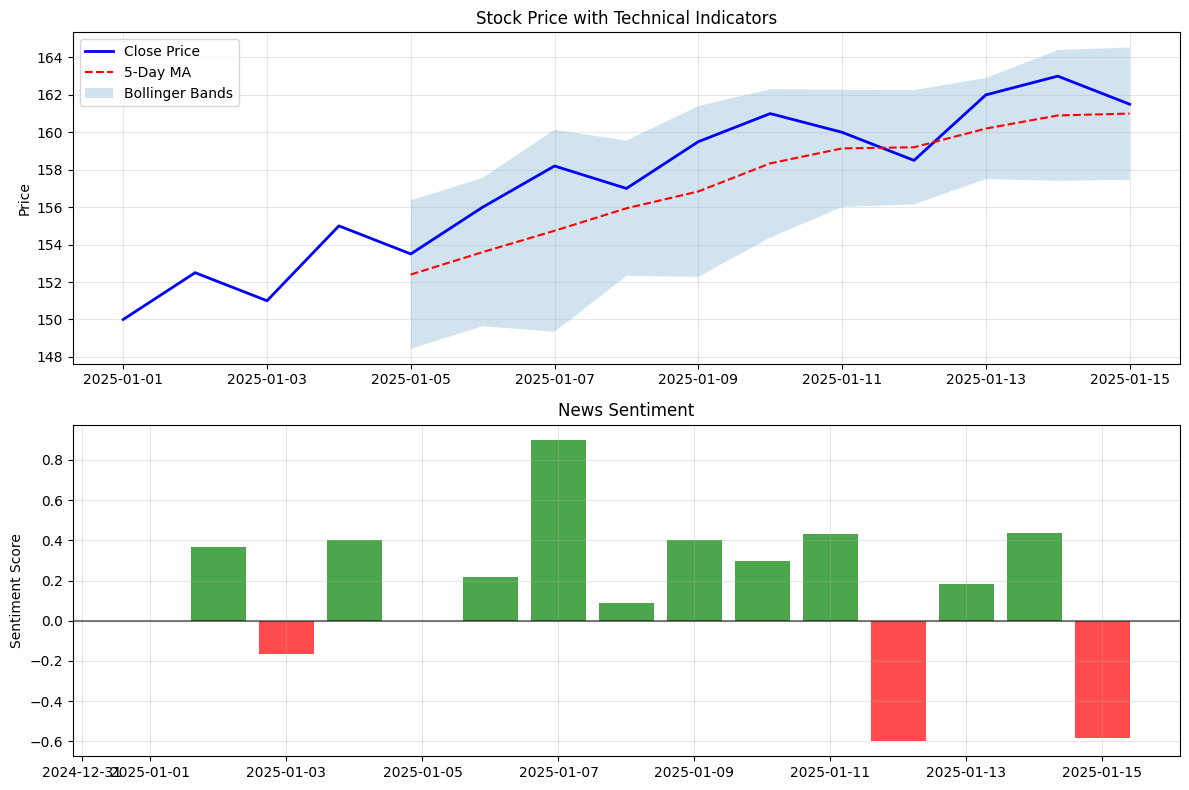


Correlation between Sentiment and Price Change: 0.636

Model-ready dataset shape: (11, 8)
Available features: ['Close', 'Volume', 'Sentiment', 'MA_5', 'RSI', 'BB_Middle', 'BB_Upper', 'BB_Lower']


In [4]:
df = pd.DataFrame(data)
df.set_index("Date", inplace=True)

# Calculate sentiment scores
df["Sentiment"] = df["News"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate technical indicators
window = 5

# Moving Average
df["MA_5"] = df["Close"].rolling(window=window).mean()

# RSI
delta = df["Close"].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
rs = gain / loss
df["RSI"] = 100 - (100 / (1 + rs))

# Bollinger Bands
df["BB_Middle"] = df["Close"].rolling(window=window).mean()
bb_std = df["Close"].rolling(window=window).std()
df["BB_Upper"] = df["BB_Middle"] + (bb_std * 2)
df["BB_Lower"] = df["BB_Middle"] - (bb_std * 2)

# Clean up for display
final_df = df.drop(["News"], axis=1)

print("Stock Analysis Results:")
print(final_df.round(2))

# Simple visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Price chart
ax1.plot(df.index, df["Close"], "b-", linewidth=2, label="Close Price")
ax1.plot(df.index, df["MA_5"], "r--", label="5-Day MA")
ax1.fill_between(
    df.index, df["BB_Lower"], df["BB_Upper"], alpha=0.2, label="Bollinger Bands"
)
ax1.set_title("Stock Price with Technical Indicators")
ax1.set_ylabel("Price")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Sentiment chart
colors = ["red" if x < 0 else "green" for x in df["Sentiment"]]
ax2.bar(df.index, df["Sentiment"], color=colors, alpha=0.7)
ax2.axhline(y=0, color="black", linestyle="-", alpha=0.5)
ax2.set_title("News Sentiment")
ax2.set_ylabel("Sentiment Score")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show correlation between sentiment and price change
df["Price_Change"] = df["Close"].pct_change()
correlation = df["Sentiment"].corr(df["Price_Change"])
print(f"\nCorrelation between Sentiment and Price Change: {correlation:.3f}")

# Model-ready features (numeric only, no NaN)
model_features = final_df.select_dtypes(include=[np.number]).dropna()
print(f"\nModel-ready dataset shape: {model_features.shape}")
print(f"Available features: {list(model_features.columns)}")


### Defining Our Prediction Goals

Depending on our goals, we should define what we're trying to predict

* **Short-Term vs. Long-Term:** Are we trying to predict the stock price for the next day (short-term) or the next year (long-term)? Short-term predictions might be more influenced by daily news sentiment, while long-term predictions will rely more on the company's underlying financial health.
* **Price Movement vs. Volatility:** Are we trying to predict the actual price of a stock, or just whether it will go up or down? Or maybe we're more interested in predicting how *volatile* the stock will be. Sentiment can be a great indicator of upcoming volatility.

### 1. ARIMA (Autoregressive Integrated Moving Average)

ARIMA is a statistical model that can be used to help forecast time series data.
- It's a good choice for short-term predictions
- Also great for predicting trends over time (e.g. if the price is going up or down)

#### Pros:
* **Simple and Interpretable:** It's based on well-understood statistical principles, so it's not too difficult to understand. You can actually see how it's making its predictions.
* **Good for Stable Trends:** If a stock has a relatively clear and consistent trend, ARIMA can do a decent job of capturing it.

#### Cons:
* **Assumes Linearity:** ARIMA assumes that the relationships in the data are linear, but stock market data is famously non-linear and chaotic. This is a big limitation.
* **Only Uses Past Prices:** The basic ARIMA model only looks at past values of the stock price itself. To include sentiment data, you need a variation called ARIMAX, which can handle external variables.
* **Not Great with Sudden Changes:** It doesn't really handle or react to sudden, unexpected events like Trump announcing something or a company announcing a new competing product.

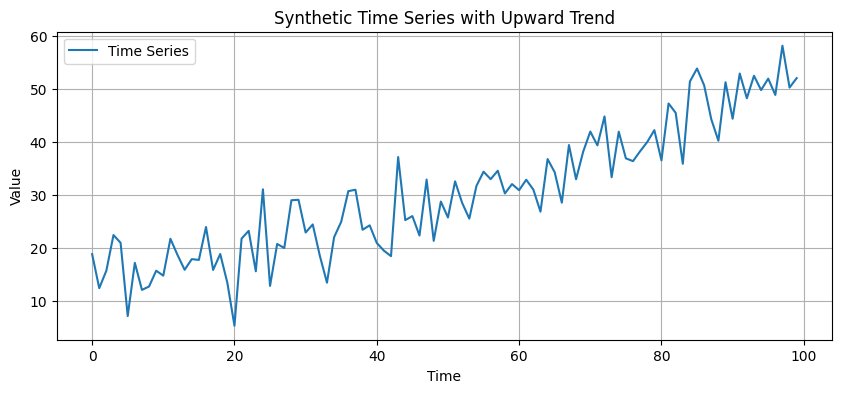

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -306.821
Date:                Thu, 03 Jul 2025   AIC                            619.642
Time:                        23:52:57   BIC                            627.427
Sample:                             0   HQIC                           622.792
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0859      0.135     -0.635      0.525      -0.351       0.179
ma.L1         -0.7074      0.105     -6.728      0.000      -0.914      -0.501
sigma2        28.5664      4.056      7.044      0.0

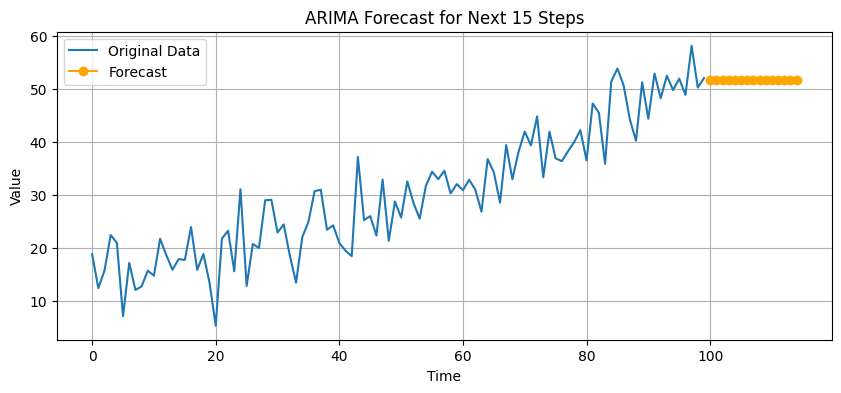

In [7]:
# Step 1: Import the libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# More fake data
np.random.seed(0)
time_steps = 100
trend = np.linspace(10, 50, time_steps)
noise = np.random.normal(loc=0, scale=5, size=time_steps)
data = trend + noise

series = pd.Series(data)

# Step 3: Plot the data to see what it looks like
plt.figure(figsize=(10, 4))
plt.plot(series, label="Time Series")
plt.title("Synthetic Time Series with Upward Trend")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Fit an ARIMA model
# ARIMA takes 3 parameters: (p, d, q)
# - p: number of autoregressive terms (AR)
# - d: number of times the data needs to be differenced (I)
# - q: number of moving average terms (MA)
model = ARIMA(series, order=(1, 1, 1))
fitted_model = model.fit()

# Step 5: Print the summary to see how the model did
print(fitted_model.summary())

# Step 6: Forecast the next 15 time steps
forecast_horizon = 15
forecast = fitted_model.forecast(steps=forecast_horizon)

# Unfortunately I couldn't really get this to work...
plt.figure(figsize=(10, 4))
plt.plot(series, label="Original Data")
plt.plot(np.arange(len(series), len(series) + forecast_horizon), forecast, label="Forecast", color='orange', marker='o')
plt.title("ARIMA Forecast for Next 15 Steps")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


### 2. LSTM (Long Short-Term Memory)

LSTMs are a type of recurrent neural network (RNN). It can basically 'remember' important information from the past, which is super useful for sequential data like time series.

#### Pros:
* **Captures Non-Linearity:** Unlike ARIMA, LSTMs are great at learning complex, non-linear patterns in data. This makes it seem (at least to me) a lot better for the stock market.
* **'Memory' for Long-Term Dependencies:** LSTMs can remember important events from further back in the past that might still be affecting the stock price today.
* **Great with Multiple Inputs:** It's easy to feed an LSTM model lots of different features, like historical prices, technical indicators, *and* our sentiment scores.

#### Cons:
* **More Complex and 'Black Box':** It's harder to understand exactly *why* an LSTM is making a particular prediction. It's less interpretable than ARIMA.
* **Needs a Lot of Data:** To work well, LSTMs usually need a large amount of historical data to learn from.
* **Can Be Slow to Train:** Training a deep LSTM model can take a lot of computational power and time...

### 3. Prophet

Prophet is a forecasting tool developed by Facebook. It's designed to be easy to use and to handle the kinds of time series data you often see in business settings.

#### Pros:
* **Handles Seasonality and Holidays:** Prophet is really good at automatically detecting yearly, weekly, and daily patterns. You can also give it a list of holidays, which can be important for stock market data.
* **Interpretable Results:** Prophet breaks down its forecast into a trend component, seasonality components, and a holiday component, so you can see what's affecting the prediction the most.

#### Cons:
* **Can Be Too Simplistic for Stocks:** While it's great for many business time series, the stock market might be a bit too complex and random for Prophet to fully capture everything that's happening.
* **Not Primarily Designed for Sentiment:** Like ARIMA, you can add extra regressors (like sentiment scores) but it's not the main idea of the model.

### 4. Transformers

Originally developed for NLP tasks (like translation), but it also seems to be super good for time series.

#### Pros:
* **Attention Mechanism:** Transformers can 'pay attention' to the most important parts of the historical data when making a prediction. This is a huge advantage over LSTMs, which can sometimes lose track of long-range dependencies.
* **Parallel Processing:** Transformers can process the entire sequence of data at once, which can make them faster to train than LSTMs (which have to go step-by-step).
* **State-of-the-Art Performance:** For many sequence-based tasks, Transformers seem to be currently the best performing model.

#### Cons:
* **Even More Complex:** Very hard to interpret.
* **Needs a TON of Data:** Transformers need massive datasets. For some stocks, you might not have enough historical data to make it worthwhile and instead should try LSTMs or ARIMA.
* **Can Be Complex to Implement:** While there are libraries that make it easier, setting up and tuning a Transformer model from scratch can be quite difficult.